# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
#remove duplicates in list source: https://www.geeksforgeeks.org/python-difference-of-two-lists-including-duplicates/
from collections import Counter 

# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
#cities_file = "cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [6]:
#look at dataset 
#cities_df=pd.read_csv(cities_file)
#cities_df.head()

## Generate Cities List

In [7]:
# structure for a API Call : http//api.openweathermap.org/data/2.5/weather?lat={lat}&lon={lon}&appid={API key}
url="http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url=f"{url}appid={api_key}&units={units}&q="

In [8]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

626

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [9]:
#testing with smaller list
#cities=['London', 'Paris']
cities=cities

#empty lists to hold response info
lat=[]
lon=[]
cloudiness= []
country= []
temp=[]
date=[]
humidity=[]
temp=[]
wind_speed= []
city_id=[]
max_temp=[]

#cities that do not pull
bad_cities=[]

# Loop through the list of cities and perform a request for data on each
for city in cities:
    try:
        response = requests.get(query_url + city).json()
        city_id.append(response['weather'][0]['id'])
        #print(f"Yay!{city} with a city id of id {response['weather'][0]['id']} was found.")
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        temp.append(response['main']['temp'])
        cloudiness.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        humidity.append(response['main']['humidity'])
        wind_speed.append(response['wind']['speed'])
        max_temp.append(response['main']['temp_max'])

    except KeyError:
       # print(f"Opps!We could not find {city}.")
        if city not in bad_cities:
            bad_cities.append(city)
#print(f"The latitude information received is: {lat}")
#print(f"The longitude information received is: {lon}")
#print(f"The temperature information received is: {temp}") 
#print(f"The cloudiness information received is: {cloudiness}") 
#print(f"The country information received is: {country}") 
#print(f"The date information received is: {date}") 
#print(f"The humidity information received is: {humidity}") 
#print(f"The wind speed information received is: {wind_speed}") 



In [10]:
#clean up cities list to get to 541

reduced_cities=list((Counter(cities) - Counter(bad_cities)).elements())
len(reduced_cities)


578

In [16]:
#create a dataframe from the lists I created above
#"City ID": city_id,
#"City": cites,


weather_dict= {
    "City ID": city_id,
    "City": reduced_cities,
    "Cloudiness": cloudiness,
    "Country": country,
    "Date": date,
    "Humidity": humidity,
    "Lat": lat,
    "Long": lon,
    "Temp": temp,
    "Wind Speed": wind_speed,
    "Max Temp": max_temp
}

weather_df=pd.DataFrame(weather_dict)




### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [17]:
weather_df.to_csv(r'weather_output.csv')

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [18]:
#  Get the indices of cities that have humidity over 100%.
humidity_high = weather_df[weather_df['Humidity']>100].index.tolist() 
print(humidity_high)
print("Guess what? You have no humdity over 100! Phew!")

[]
Guess what? You have no humdity over 100! Phew!


In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

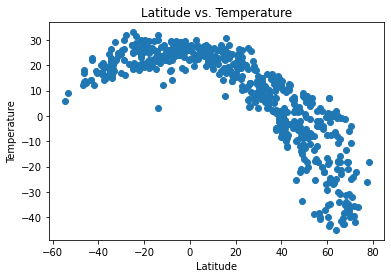

In [20]:
x_values=weather_df['Lat']
y_values=weather_df['Temp']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.title('Latitude vs. Temperature')
plt.show()
#Print(add a sentence here)

## Latitude vs. Humidity Plot

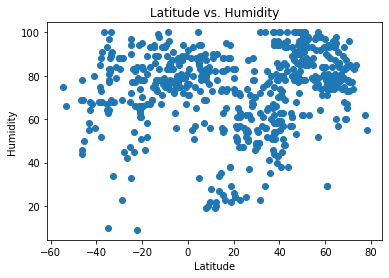

In [21]:
x_values=weather_df['Lat']
y_values=weather_df['Humidity']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Latitude vs. Humidity')
plt.show()
#Print(add a sentence here)

## Latitude vs. Cloudiness Plot

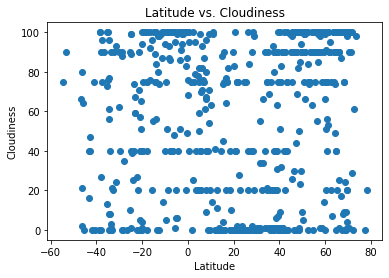

In [22]:
x_values=weather_df['Lat']
y_values=weather_df['Cloudiness']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Latitude vs. Cloudiness')
plt.show()
#Print(add a sentence here)

## Latitude vs. Wind Speed Plot

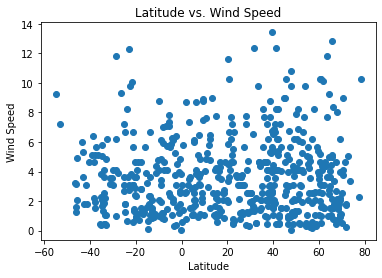

In [25]:
x_values=weather_df['Lat']
y_values=weather_df['Wind Speed']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Latitude vs. Wind Speed')
plt.show()
#Print(add a sentence here)

## Linear Regression

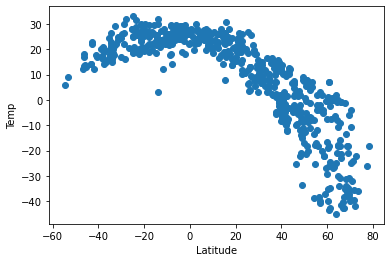

In [26]:
x_values=weather_df['Lat']
y_values=weather_df['Temp']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Temp')
plt.show()
#Print(add a sentence here)

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [27]:
#look at total dataframe and use loc to 

north = weather_df.loc[weather_df["Lat"] >= 0]
north_df = pd.DataFrame(north)

south = weather_df.loc[weather_df["Lat"] < 0]
south_df = pd.DataFrame(south)

In [29]:
north_df.head(3)

,City ID,City,Cloudiness,Country,Date,Humidity,Lat,Long,Temp,Wind Speed,Max Temp
0,804,hambantota,93,LK,1611965531,82,6.1241,81.1185,24.15,3.85,24.15
1,600,nokia,90,FI,1611965531,93,61.4667,23.5000,-7.66,4.12,-7.22
3,802,albany,40,US,1611965532,69,42.6001,-73.9662,-11.78,0.45,-10.00


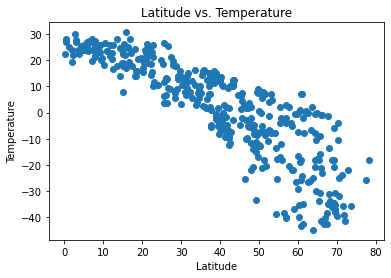

In [31]:
#options, binning
north_x_values=north_df['Lat']
north_y_values=north_df['Temp']
plt.scatter(north_x_values,north_y_values)
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.title('Latitude vs. Temperature')
plt.show()
#Print(add a sentence here)
#add linear regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

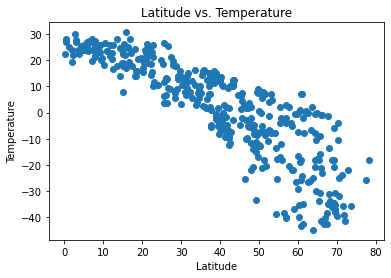

In [32]:
south_x_values=south_df['Lat']
south_y_values=south_df['Temp']
plt.scatter(north_x_values,north_y_values)
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.title('Latitude vs. Temperature')
plt.show()
#Print(add a sentence here)
#add linear regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression